In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rc
from scipy.stats import pearsonr

In [2]:
rc('font', family='Malgun Gothic') # Windows OS 
# rc('font', family='AppleGothic') # os x(mac os)  

%matplotlib inline
plt.style.use("ggplot") # 그래프를 격자 스타일로 (숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용.)
mpl.rcParams["axes.unicode_minus"] = False # 그래프에서 마이너스 폰트 깨지는 문제 해결을 위해

In [3]:
# Data load
df = pd.read_csv("data/train.csv")
df.head()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781


In [12]:
# check missing data
df.isnull().values.any() # False -> No missing data

False

In [61]:
corr = df.corr()

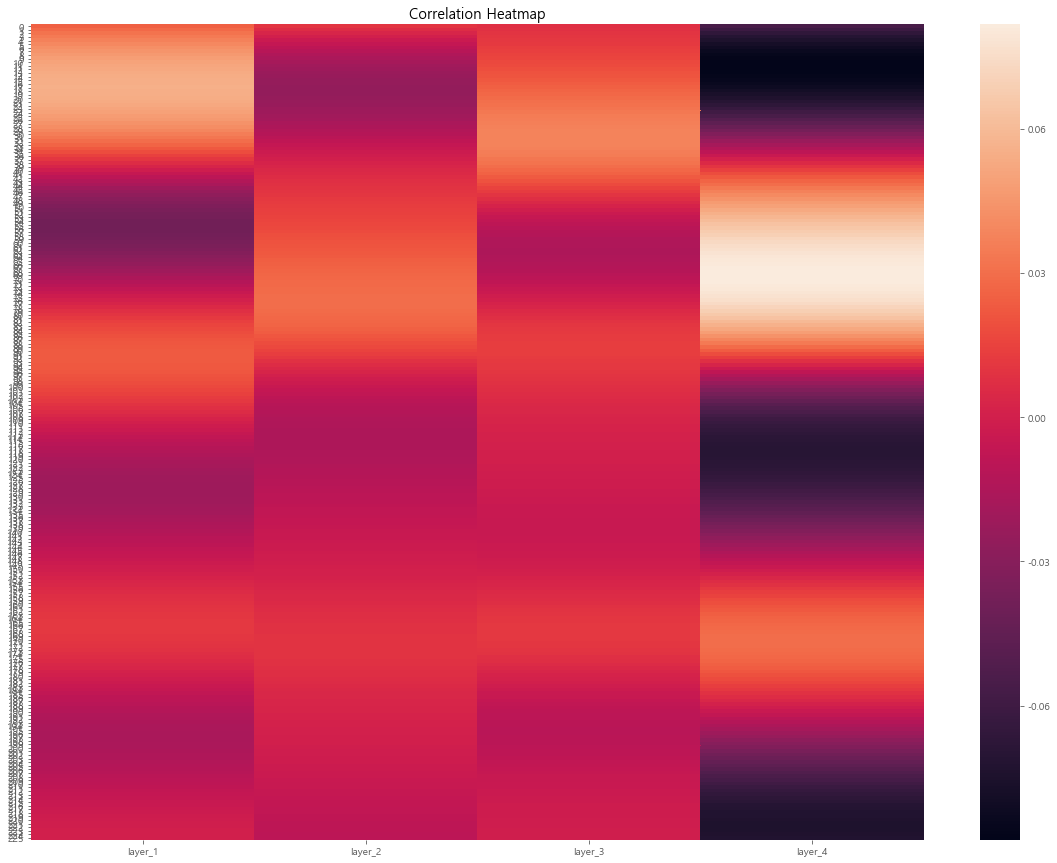

In [35]:
# correlation heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
sns.heatmap(corr.iloc[4:, :4],
            xticklabels=corr.columns.values[:4],
            yticklabels=corr.columns.values[4:])

In [60]:
# layer_1과 correlation 높은 columns 추출
corr_1 = corr[corr['layer_1'] > 0.01]['layer_1'][1:]
cor_col_1 = np.array(pd.DataFrame(corr_1).index)

# layer_2과 correlation 높은 columns 추출
corr_2 = corr[corr['layer_2'] > 0.01]['layer_2'][1:]
cor_col_2 = np.array(pd.DataFrame(corr_2).index)

# layer_3과 correlation 높은 columns 추출
corr_3 = corr[corr['layer_3'] > 0.01]['layer_3'][1:]
cor_col_3 = np.array(pd.DataFrame(corr_3).index)

# layer_4과 correlation 높은 columns 추출
corr_4 = corr[corr['layer_4'] > 0.01]['layer_4'][1:]
cor_col_4 = np.array(pd.DataFrame(corr_4).index)

array(['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '83',
       '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94',
       '95', '96', '164', '165', '166', '167', '168', '169', '170', '171',
       '172'], dtype=object)

In [68]:
# p-value check
p_df = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(len(df.columns)) 

In [69]:
p_df

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
layer_1,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.657242e-113,1.549166e-144,2.639482e-178,4.637497e-213,1.340616e-247,5.527364e-284,...,6.205930e-04,4.320363e-03,2.273670e-02,6.950748e-02,1.515941e-01,3.792990e-01,5.728570e-01,7.487634e-01,9.363355e-01,8.823741e-01
layer_2,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.529769e-18,6.870425e-09,7.575686e-03,8.037515e-01,2.495571e-03,1.499132e-08,...,7.518016e-10,1.623287e-10,1.807282e-11,1.811539e-12,3.446934e-13,2.309127e-14,6.092272e-15,8.163316e-16,1.975516e-16,3.928447e-17
layer_3,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,3.064249e-12,5.691437e-15,6.157931e-18,3.819649e-21,2.409640e-24,1.161940e-27,...,3.488961e-02,5.478258e-02,7.542073e-02,1.111852e-01,1.403683e-01,2.204162e-01,2.995401e-01,4.195772e-01,5.129957e-01,6.571612e-01
layer_4,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
0,2.657242e-113,1.529769e-18,3.064249e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.052414e-03,1.106679e-01,8.031030e-01,3.118235e-01,1.557896e-02,2.513399e-04,1.246056e-06,6.864647e-09,3.201215e-11,6.189568e-13
1,1.549166e-144,6.870425e-09,5.691437e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.240348e-07,4.136603e-05,2.968658e-03,6.326213e-02,6.101554e-01,4.577392e-01,4.254748e-02,1.545885e-03,1.834509e-05,2.074042e-07
2,2.639482e-178,7.575686e-03,6.157931e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,7.856827e-11,5.636041e-09,5.055868e-07,2.595603e-05,1.913232e-03,4.038231e-02,3.727251e-01,8.347100e-01,1.666025e-01,1.451723e-02
3,4.637497e-213,8.037515e-01,3.819649e-21,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.368200e-13,4.502253e-12,1.224910e-10,2.901852e-09,3.050057e-07,1.431729e-05,6.443506e-04,1.293399e-02,1.541426e-01,6.905394e-01
4,1.340616e-247,2.495571e-03,2.409640e-24,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.314673e-13,4.959795e-13,1.767289e-12,5.682319e-12,1.421279e-10,2.183773e-09,6.934828e-08,1.815096e-06,6.901902e-05,1.623747e-03
5,5.527364e-284,1.499132e-08,1.161940e-27,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.670658e-12,1.201932e-12,9.118053e-13,5.206040e-13,1.844270e-12,3.723347e-12,1.816588e-11,1.134635e-10,2.141181e-09,4.743370e-08


In [77]:
# layer_1과 p-value가 높은 columns 추출
p_1 = p_df[p_df['layer_1'] < 0.05]['layer_1'][1:]
p_col_1 = np.array(pd.DataFrame(p_1).index)
p_col_1

# 해당 데이터에서는 모든 열이 target(layer)에 대해서 유의미한 차이가 있다
# 즉, p value가 거의 다 0.05 미만이다

array(['0', '1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81',
       '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92',
       '93', '94', '95', '96', '99', '100', '101', '102', '103', '104',
       '105', '106', '107', '108', '109', '110', '111', '112', '113',
       '114', '115', '116', '117', '118', '119', '120', '121', '122',
       '123', '124', '125', '126', '127', '128', '129', '130', '131',
       '132', '133', '134', '135', '136', '137', '138', '139', '140',
       '141', '142', '143', '144', '145', '155', '156', '157', '158